## Decoding Arrest Decisions in Terry Traffic Stops

## Project Overview

The Terry Traffic Stops project aims to unravel the complex dynamics behind police decisions during traffic stops, particularly focusing on whether an arrest is made. Building on the legal precedent set by Terry v. Ohio, which introduced the concept of "reasonable suspicion," the project develops a machine learning model to predict the likelihood of arrest following a stop.

Using a rich dataset that includes details such as the stop’s context, demographics, and circumstances, the model seeks to identify patterns and key factors influencing these critical decisions. Beyond understanding police behavior, the project aspires to inform policy, promote fairness, and enhance transparency in law enforcement practices. Through this analysis, the Terry Traffic Stops project contributes to the broader conversation on policing and civil rights.

## Business Problem

Terry Stops, rooted in the principle of “reasonable suspicion,” allow police officers to temporarily detain individuals for investigation. However, the decision to escalate a stop to an arrest can be influenced by a variety of factors, some of which may not be immediately clear or consistent. This project seeks to address the complexities involved in these critical decisions through a multifaceted approach:

1. **Identifying Key Factors**: The project aims to determine the primary factors that influence whether an arrest is made following a Terry Stop. These factors could range from situational elements, such as time and location, to individual characteristics, including behavior and demeanor during the stop. Understanding these variables is crucial for identifying patterns and ensuring that decisions are made based on objective criteria.

2. **Predictive Modeling**: To systematically analyze these factors, the project will develop a binary classification model capable of predicting the likelihood of an arrest. By leveraging historical data, this model will provide a data-driven approach to anticipate outcomes, allowing law enforcement agencies to understand the potential impact of various factors on arrest decisions.

3. **Policy Evaluation**: A key focus of the project is to provide insights into the role of demographic factors, such as race and gender, in arrest decisions. By examining these elements, the project will help ensure that arrest decisions are fair and unbiased, fostering greater transparency and addressing ethical concerns in policing practices.

4. **Resource Allocation**: Understanding the patterns and factors that lead to arrests can also assist law enforcement agencies in better allocating their resources. By identifying areas where arrests are more likely or understanding the circumstances that typically lead to such outcomes, agencies can deploy their personnel more effectively and make informed decisions about training and policy development.


## Research Questions:

1. **Prediction Accuracy**: How well can we predict whether a traffic stop will occur using factors like location, time of day, and demographic information?

2. **Key Influences**: Which factors are most important in predicting traffic stops? Are there any surprising trends or patterns?

3. **Bias and Fairness**: Does the model show any bias in its predictions? For example, does it unfairly target certain groups of drivers more than others?


## Data Understanding Overview
In this phase, we explore the Terry Traffic Stops dataset to gain insights into the variables that describe police interactions during traffic stops. The dataset includes detailed information on both the individuals stopped and the officers involved, covering demographics, stop outcomes, and geographical data. By examining these features, we aim to identify key factors that influence stop outcomes, assess potential biases, and prepare the data for further analysis and modeling

1. **Subject Age Group**: Categorizes the age of the individual involved in the stop.
2. **Subject ID**: Unique identifier for each individual stopped.
3. **GO / SC Num**: Case or report number associated with the stop.
4. **Terry Stop ID**: Unique identifier for each specific Terry Stop event.
5. **Stop Resolution**: Outcome of the stop (e.g., arrest, warning).
6. **Weapon Type**: Type of weapon found, if any, during the stop.
7. **Officer ID**: Unique identifier for the officer conducting the stop.
8. **Officer YOB**: Year of birth of the officer involved in the stop.
9. **Officer Gender**: Gender of the officer involved in the stop.
10. **Officer Race**: Race of the officer conducting the stop.
11. **Subject Perceived Race**: Race of the individual as perceived by the officer.
12. **Subject Perceived Gender**: Gender of the individual as perceived by the officer.
13. **Reported Date**: Date when the stop was reported.
14. **Reported Time**: Time of day when the stop was reported.
15. **Initial Call Type**: Reason for the initial call that led to the stop.
16. **Final Call Type**: Nature of the call after the stop was resolved.
17. **Call Type**: General category of the call or incident.
18. **Officer Squad**: The squad or unit to which the officer belongs.
19. **Arrest Flag**: Indicator of whether the stop resulted in an arrest.
20. **Frisk Flag**: Indicator of whether the individual was frisked during the stop.
21. **Precinct**: The police precinct where the stop took place.
22. **Sector**: Sub-division within a precinct for geographical analysis.
23. **Beat**: Smallest geographical area of police patrol.


## Step 1: Import all the Necessary Libraries

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [423]:
# Load the dataset and print out the first few rows of our data
df = pd.read_csv("Terry_Traffic_Stops.csv")

# Display the first few rows to verify the data
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,7732696346,20190000315233,9803669705,Field Contact,-,4161,1957,M,American Indian/Alaska Native,...,10:47:39.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT 1ST W - KING - PLATOON 1,N,N,West,K,K2
1,46 - 55,8295859194,20190000207006,8299762394,Arrest,-,6404,1971,M,White,...,17:08:12.0000000,BURG - OCCUPIED RESD,--PROPERTY DEST (DAMG),911,NORTH PCT 2ND W - NORA (JOHN) - PLATOON 1,Y,N,North,N,N3
2,26 - 35,-1,20170000002886,467843,Field Contact,NaN,7430,1984,F,White,...,17:48:00.0000000,-,-,-,NORTH PCT 2ND WATCH - NORTH BEATS,N,Y,-,-,-
3,1 - 17,-1,20180000275743,472723,Offense Report,NaN,5151,1962,M,White,...,11:49:00.0000000,-,-,-,SOUTHWEST PCT 1ST W - WILLIAM - PLATOON 2,N,N,Southwest,F,F1
4,36 - 45,16227498273,20220000263279,37099192062,Arrest,-,7655,1982,M,Nat Hawaiian/Oth Pac Islander,...,22:18:36.0000000,SHOPLIFT - THEFT,--BURGLARY - NON RESIDENTIAL/COMMERCIAL,ONVIEW,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,Y,N,Southwest,F,F2


Lets have a general overview of our dataset

In [424]:

class DataFrameInspector:
    def __init__(self, file_path):
        # Initialize the class with the file path and load the DataFrame
        self.file_path = file_path
        self.df = pd.read_csv(file_path)

    def display_info(self):
        # Display basic information about the DataFrame
        print("DataFrame Info:")
        self.df.info()

    def show_head(self, n=5):
        # Show the first n rows of the DataFrame
        print(f"\nFirst {n} rows:")
        print(self.df.head(n))

    def show_basic_stats(self):
        # Display summary statistics for numerical columns
        print("\nBasic statistics:")
        print(self.df.describe())

    def count_null_values(self):
        # Count the number of null values in each column
        print("\nNull values per column:")
        print(self.df.isnull().sum())

    def count_unique_values(self):
        # Count the number of unique values in each column
        print("\nUnique values per column:")
        print(self.df.nunique())

    def inspect_all(self):
        # Run all inspection methods
        self.display_info()
        self.show_head()
        self.show_basic_stats()
        self.count_null_values()
        self.count_unique_values()

inspector = DataFrameInspector('Terry_Traffic_Stops.csv')
inspector.inspect_all()

# Alternatively, you can call individual methods:
# inspector.display_info()
# inspector.show_head(10)  # Show first 10 rows
# inspector.show_basic_stats()
# inspector.count_null_values()
# inspector.count_unique_values()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61021 entries, 0 to 61020
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61021 non-null  object
 1   Subject ID                61021 non-null  int64 
 2   GO / SC Num               61021 non-null  int64 
 3   Terry Stop ID             61021 non-null  int64 
 4   Stop Resolution           61021 non-null  object
 5   Weapon Type               28456 non-null  object
 6   Officer ID                61021 non-null  object
 7   Officer YOB               61021 non-null  int64 
 8   Officer Gender            61021 non-null  object
 9   Officer Race              61021 non-null  object
 10  Subject Perceived Race    61021 non-null  object
 11  Subject Perceived Gender  61021 non-null  object
 12  Reported Date             61021 non-null  object
 13  Reported Time             61021 non-null  object
 14  Initia

## Data Understanding: General overview

1. Dataset Overview

The Terry Traffic Stops dataset contains a comprehensive record of 61,021 police stops. This data is organized across 23 columns, providing a detailed view of each incident.

2. Data Structure

The dataset's structure comprises 4 integer columns and 19 object columns. The object columns likely contain strings or mixed data types, allowing for a diverse range of information to be captured.

3. Missing Data

While most columns are complete, there are two notable exceptions. The "Weapon Type" column has the highest number of null values at 32,565, suggesting that weapon information is not always available or applicable. Additionally, the "Officer Squad" column has 561 missing entries.

4. Key Column Categories

4.1 Subject Information
The dataset includes details about the subjects of the stops, such as their age group, ID, perceived race, and perceived gender.

4.2 Officer Details
Information about the officers conducting the stops is also recorded, including their ID, year of birth (YOB), gender, and race.

4.3 Stop Characteristics
Each stop is documented with a unique Terry Stop ID, along with the stop resolution and the reported date and time.

4.4 Location Data
The geographic context of each stop is captured through precinct, sector, and beat information.

5. Numerical Insights

The "Officer YOB" column provides interesting demographic data about the police force. Birth years range from 1900 to 2002, with a mean of 1984. Both the Subject ID and Terry Stop ID columns show a wide range of values, likely serving as unique identifiers for each entry.

6. Categorical Data Highlights

Several columns offer insights into the nature of the stops and the diversity of those involved:
- Stop Resolution has 5 unique categories, indicating various outcomes of the stops.
- There are 9 distinct precincts represented in the data.
- Officer Race is categorized into 9 groups.
- Subject Perceived Race has 11 unique categories, suggesting a detailed approach to recording racial data.

7. Flag Columns

The dataset includes two flag columns that provide quick reference points:
- Arrest Flag is binary, indicating whether an arrest was made.
- Frisk Flag has 3 unique values, potentially indicating different levels or types of frisking procedures.

## Column classification

In [425]:
def classify_columns(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Initialize lists to store column names
    numerical_columns = []
    categorical_columns = []

    # Iterate through each column
    for column in df.columns:
        # Check if the column is numerical
        if df[column].dtype in ['int64', 'float64']:
            numerical_columns.append(column)
        else:
            # Check if the column is categorical
            if df[column].dtype == 'object' or df[column].dtype.name == 'category':
                categorical_columns.append(column)
            # If it's neither numerical nor categorical (e.g., datetime), you can add more conditions here

    # Print the results
    print("Numerical columns:")
    for col in numerical_columns:
        print(f"- {col}")

    print("\nCategorical columns:")
    for col in categorical_columns:
        print(f"- {col}")

    # Return the lists if you need to use them later
    return numerical_columns, categorical_columns

# Usage
file_path = 'Terry_Traffic_Stops.csv'
num_cols, cat_cols = classify_columns(file_path)

Numerical columns:
- Subject ID
- GO / SC Num
- Terry Stop ID
- Officer YOB

Categorical columns:
- Subject Age Group
- Stop Resolution
- Weapon Type
- Officer ID
- Officer Gender
- Officer Race
- Subject Perceived Race
- Subject Perceived Gender
- Reported Date
- Reported Time
- Initial Call Type
- Final Call Type
- Call Type
- Officer Squad
- Arrest Flag
- Frisk Flag
- Precinct
- Sector
- Beat


### Dataset Classification Overview

The dataset is composed of two primary types of columns: **Numerical** and **Categorical**.

- **Numerical Columns:** These columns consist of data that represent measurable quantities or unique identifiers. They typically include values that can be used for mathematical operations, such as calculating averages or identifying unique instances.

- **Categorical Columns:** These columns contain data that represent distinct groups or categories. Categorical data is used to classify and label information, often representing qualitative aspects of the dataset, such as characteristics, types, or outcomes.

Understanding these categories is crucial for selecting the right analytical and modeling techniques, as numerical and categorical data often require different approaches.


# Step 2: Data Cleaning

Identify and handle missing values

Scrub the data to remove any inaccuracies or inconsistencies

Transform and organize the data into a standardized format for analysis

Enhance the quality and usability of the data through restructuring and formatting adjustments.

## 2.1 Handling Missing Values

In [426]:
#Checking correlation between missing values and another feature
df['Weapon_Type_Missing'] = df['Weapon Type'].isna()
df.groupby('Precinct')['Weapon_Type_Missing'].mean()


Precinct
-            0.813030
East         0.505514
FK ERROR     0.000000
North        0.579929
OOJ          0.000000
South        0.497290
Southwest    0.460560
Unknown      0.950000
West         0.371315
Name: Weapon_Type_Missing, dtype: float64

### Interpretation of Missing Values in the "Weapon Type" Column

The output shows the mean proportion of missing values in the **Weapon Type** column for each **Precinct**. Here’s what the results imply:

1. **High Proportion of Missing Values in Some Precincts:**
   - **"-" Precinct:** About **81.3%** of the rows for this precinct have missing values in the **Weapon Type** column. This is a very high proportion, indicating that most data for this precinct is missing for this feature.
   - **"Unknown" Precinct:** About **95%** of the data for this precinct is missing in the **Weapon Type** column, suggesting a severe lack of data for this feature in this group.

2. **Moderate Proportion of Missing Values:**
   - **East, North, South Precincts:** Around **50-58%** of the data is missing in the **Weapon Type** column for these precincts, which is a significant amount that might affect the model if these rows are dropped.

3. **Low to No Missing Values:**
   - **"FK ERROR" and "OOJ" Precincts:** Both have **0%** missing values, indicating that all data for the **Weapon Type** column is available.
   - **"West" and "Southwest" Precincts:** Have around **37.1% and 46.1%** missing values, respectively, which is still substantial but lower than in other precincts.

### Implications for the Data and the Model

- **Non-Random Missing Data:**  
  The varying proportions of missing values across precincts suggest that the missingness is not random. Certain precincts, such as **"-"** and **"Unknown"**, have a much higher likelihood of missing **Weapon Type** data, which could indicate underlying patterns or data collection issues. Dropping these rows could introduce bias into the model, particularly against precincts with high rates of missing data, potentially leading to skewed predictions.

- **Potential Bias Introduction:**  
  Since missing values are not uniformly distributed, removing them could disproportionately affect the representation of certain precincts. This could reduce the model’s accuracy or fairness by excluding relevant data, especially if **Weapon Type** is an important predictor of the outcome.

### Actionable Next Steps

- **Imputation Strategy:**  
  Consider imputing missing values using a placeholder ("Unknown") or filling in based on patterns in the data (e.g., the most common **Weapon Type** within each precinct).

- **Feature Engineering:**  
  Create a binary feature indicating whether **Weapon Type** is missing, as this could provide valuable information about the nature of stops in specific precincts.


In [427]:
# Feature engineering
# 1. Create a binary indicator for missing 'Weapon Type'
df['Weapon_Type_Missing'] = df['Weapon Type'].isna().astype(int)

# 2. Impute missing 'Weapon Type' values with a placeholder
df['Weapon Type'].fillna('Unknown', inplace=True)

# 3. Feature engineering: Create interaction feature between 'Weapon Type' and 'Precinct'
df['Weapon_Precinct_Interaction'] = df['Weapon Type'] + '_' + df['Precinct']

# 4. Feature engineering: Extract date-related features from 'Reported Date'
df['Reported_Year'] = pd.to_datetime(df['Reported Date']).dt.year
df['Reported_Month'] = pd.to_datetime(df['Reported Date']).dt.month
df['Reported_Day'] = pd.to_datetime(df['Reported Date']).dt.day

# 5. Feature engineering: Extract time-related features from 'Reported Time'
# Use `errors='coerce'` to handle any inconsistent formats
df['Reported_Hour'] = pd.to_datetime(df['Reported Time'], errors='coerce').dt.hour

# Verify the newly created features
print(df[['Weapon Type', 'Weapon_Type_Missing', 'Weapon_Precinct_Interaction', 
          'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour']].head())


  Weapon Type  Weapon_Type_Missing Weapon_Precinct_Interaction  Reported_Year  \
0           -                    0                      -_West           2019   
1           -                    0                     -_North           2019   
2     Unknown                    1                   Unknown_-           2017   
3     Unknown                    1           Unknown_Southwest           2018   
4           -                    0                 -_Southwest           2022   

   Reported_Month  Reported_Day  Reported_Hour  
0               8            24             10  
1               6             7             17  
2               7             7             17  
3               8            20             11  
4              10             1             22  


In [428]:
# Count missing values before dropping
missing_count = df['Officer Squad'].isnull().sum()

# Drop rows with missing values in 'Officer Squad'
df = df.dropna(subset=['Officer Squad'])

# Verify the drop
remaining_count = len(df)

In our analysis of the Terry Traffic Stops dataset, we encountered missing values in the 'Officer Squad' column. After careful consideration, we decided to drop these rows with missing values. Here's why:

### 1. Small Proportion of Missing Data

- Total rows in the dataset: 61,021
- Rows with missing 'Officer Squad' data: 561
- Percentage of missing data: 0.92%

With less than 1% of the data missing, removing these rows is unlikely to significantly impact our analysis or introduce bias.

### 2. Preserving Data Integrity

By removing incomplete records, we ensure that all remaining data points have complete information for the 'Officer Squad' variable. This is crucial for maintaining the integrity of our analysis, especially if the officer's squad is an important factor in our study.

### 3. Avoiding Assumptions

Dropping the rows avoids making potentially incorrect assumptions about the missing data. Methods like imputation or creating a separate 'Unknown' category might introduce bias or noise into our analysis.

### 4. Simplicity and Transparency

This approach is straightforward and easy to explain, enhancing the transparency and reproducibility of our analysis. It doesn't require complex imputation techniques that might be difficult to justify or interpret.

### 5. Minimal Impact on Statistical Power

Given the large size of our dataset (over 60,000 rows), removing 561 rows is unlikely to significantly reduce the statistical power of our analyses.

### 6. Clean Dataset for Analysis

By working with a complete dataset, we simplify subsequent analysis steps and reduce the risk of errors or unexpected behavior due to missing values.

### Impact on Analysis

- Final dataset size: 60,460 rows
- All subsequent analyses will be performed on this cleaned dataset


## Cleaning the 'Subject Age Group' Column

We're extracting the lower bound of the age range from the 'Subject Age Group' column for several important reasons:

1. **Consistency**: By using the lower bound, we create a consistent numerical representation of age groups.

2. **Simplification**: This simplifies the data while retaining the essential age category information.

3. **Ease of Analysis**: Numerical values are easier to work with in many statistical analyses and machine learning models.

4. **Ordinal Nature**: The lower bound preserves the ordinal nature of age groups, allowing for meaningful comparisons.

5. **Improved Visualization**: Simplified age groups can lead to clearer and more interpretable visualizations.

6. **Potential for Binning**: If needed, we can easily create broader age categories from these numerical values.

This cleaning step prepares the age data for more effective use in our analysis of traffic stop patterns and potential biases.

## 3.1 Exploratory Data Analysis



In [429]:
# Subject Age Group (already represents ranges)
df['Age Group'] = df['Subject Age Group'].str.split(' - ').str[0]  # Extract the lower bound of the range

df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Precinct,Sector,Beat,Weapon_Type_Missing,Weapon_Precinct_Interaction,Reported_Year,Reported_Month,Reported_Day,Reported_Hour,Age Group
0,36 - 45,7732696346,20190000315233,9803669705,Field Contact,-,4161,1957,M,American Indian/Alaska Native,...,West,K,K2,0,-_West,2019,8,24,10,36
1,46 - 55,8295859194,20190000207006,8299762394,Arrest,-,6404,1971,M,White,...,North,N,N3,0,-_North,2019,6,7,17,46
2,26 - 35,-1,20170000002886,467843,Field Contact,Unknown,7430,1984,F,White,...,-,-,-,1,Unknown_-,2017,7,7,17,26
3,1 - 17,-1,20180000275743,472723,Offense Report,Unknown,5151,1962,M,White,...,Southwest,F,F1,1,Unknown_Southwest,2018,8,20,11,1
4,36 - 45,16227498273,20220000263279,37099192062,Arrest,-,7655,1982,M,Nat Hawaiian/Oth Pac Islander,...,Southwest,F,F2,0,-_Southwest,2022,10,1,22,36


## 3.2 Dropping irrelevant columns

In [430]:
# Drop irrelevant columns
#'Officer YOB',  # Might be useful as 'Officer Experience'
#'Reported Date',  # Might be redundant with derived features
#'Reported Time',  # Might be redundant with derived features
# Drop the safe_to_drop columns permanently

irrelevant_columns = ['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer ID', 'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad', 'Precinct', 'Sector', 'Beat']
df = df.drop(irrelevant_columns, axis=1)

# Verify the DataFrame after dropping columns
print(df.head())

  Subject Age Group Stop Resolution Weapon Type  Officer YOB Officer Gender  \
0           36 - 45   Field Contact           -         1957              M   
1           46 - 55          Arrest           -         1971              M   
2           26 - 35   Field Contact     Unknown         1984              F   
3            1 - 17  Offense Report     Unknown         1962              M   
4           36 - 45          Arrest           -         1982              M   

                    Officer Race     Subject Perceived Race  \
0  American Indian/Alaska Native                          -   
1                          White                      White   
2                          White                      White   
3                          White  Black or African American   
4  Nat Hawaiian/Oth Pac Islander                      White   

  Subject Perceived Gender         Reported Date     Reported Time  \
0                     Male  2019-08-24T00:00:00Z  10:47:39.0000000   
1     

### Considerations for Dropping Potential Features

After further analysis, the features listed in **`potential_drops`** could potentially increase model complexity without significantly improving its performance due to the following reasons:

- **Overfitting and Complexity:**
  - **Larger Models:** Including more features can lead to larger models, increasing the risk of overfitting—where the model performs well on training data but poorly on unseen data.
  - **Training Time:** Training a complex model with many features takes longer and requires more computational resources.

- **Redundant Information:**
  - **Overlapping Features:** Some features may contain similar or redundant information. For example, "Reported Date" and "Reported Time" can be effectively combined into simpler features like "Day of Week" or "Time of Day."
  - **Difficult Categorical Features:** Categorical features with many unique categories may be challenging for models to interpret and learn from effectively.

- **Privacy Concerns:**
  - **Location Information:** Features such as "Officer Squad" or "Precinct" could contain sensitive location data, which may require aggregation into larger geographical units to address privacy concerns.

### Feature Engineering: Creating a Binary 'Arrested' Column

Before handling missing values, we noticed a correlation between the columns **'Stop Resolution'** and **'Arrest Flag'**. To capture this relationship, we can create a new binary **'Arrested'** column to indicate whether an arrest was made.


Let's create a binary column "Arrested" based on the correlation between "Stop Resolution" and "Arrest Flag"

In [431]:
# Feature engineering
# Creating the 'Arrested' column based on the 'Stop Resolution' and 'Arrest Flag'
df['Arrested'] = ((df['Stop Resolution'].str.contains('Arrest', case=False, na=False)) | (df['Arrest Flag'] == 1)).astype(int)

# Verify the new column by displaying the first few rows
print(df[['Stop Resolution', 'Arrest Flag', 'Arrested']].head())


  Stop Resolution Arrest Flag  Arrested
0   Field Contact           N         0
1          Arrest           Y         1
2   Field Contact           N         0
3  Offense Report           N         0
4          Arrest           Y         1



1. **`Frisk Flag` Transformation:**
   - Converts the **`Frisk Flag`** column from categorical values ('Y' for yes, others for no) to binary values (`1` for "Yes" and `0` for "No").
   - **Purpose:** Simplifies the data into a numeric format suitable for machine learning models, which typically perform better with numerical inputs.

2. **`Weapon Type` Transformation:**
   - Replaces the placeholder `'-'` in the **`Weapon Type`** column with `'None'` to clearly indicate that no weapon was found.
   - **Purpose:** Improves data clarity by using a meaningful label (`'None'`), making it easier to interpret and analyze the data.


In [432]:

# Transform 'Frisk Flag' to binary values (1 for 'Y', 0 otherwise)
df['Frisk Flag'] = df['Frisk Flag'].map(lambda x: 1 if x == 'Y' else 0)

# Replace missing or placeholder values in 'Weapon Type' with 'None'
df['Weapon Type'] = df['Weapon Type'].map(lambda x: 'None' if x == '-' else x)

# Verify the changes by displaying the first few rows
print(df[['Frisk Flag', 'Weapon Type']].head())

df.head()


   Frisk Flag Weapon Type
0           0        None
1           0        None
2           1     Unknown
3           0     Unknown
4           0        None


,Subject Age Group,Stop Resolution,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag,Weapon_Type_Missing,Weapon_Precinct_Interaction,Reported_Year,Reported_Month,Reported_Day,Reported_Hour,Age Group,Arrested
0,36 - 45,Field Contact,None,1957,M,American Indian/Alaska Native,-,Male,2019-08-24T00:00:00Z,10:47:39.0000000,N,0,0,-_West,2019,8,24,10,36,0
1,46 - 55,Arrest,None,1971,M,White,White,Male,2019-06-07T00:00:00Z,17:08:12.0000000,Y,0,0,-_North,2019,6,7,17,46,1
2,26 - 35,Field Contact,Unknown,1984,F,White,White,Male,2017-07-07T00:00:00Z,17:48:00.0000000,N,1,1,Unknown_-,2017,7,7,17,26,0
3,1 - 17,Offense Report,Unknown,1962,M,White,Black or African American,Female,2018-08-20T00:00:00Z,11:49:00.0000000,N,0,1,Unknown_Southwest,2018,8,20,11,1,0
4,36 - 45,Arrest,None,1982,M,Nat Hawaiian/Oth Pac Islander,White,Male,2022-10-01T00:00:00Z,22:18:36.0000000,Y,0,0,-_Southwest,2022,10,1,22,36,1


Let's transform our month and time column for compatibility with machine learning models

In [433]:

df['Reported Month'] = df['Reported Date'].map(lambda x: int(x[5:7]))
df.drop('Reported Date', axis=1, inplace=True)

df['Reported Hour'] = df['Reported Time'].map(lambda x: int(x[:2]))
df.drop('Reported Time', axis = 1, inplace=True)

df.head()

,Subject Age Group,Stop Resolution,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Arrest Flag,Frisk Flag,Weapon_Type_Missing,Weapon_Precinct_Interaction,Reported_Year,Reported_Month,Reported_Day,Reported_Hour,Age Group,Arrested,Reported Month,Reported Hour
0,36 - 45,Field Contact,None,1957,M,American Indian/Alaska Native,-,Male,N,0,0,-_West,2019,8,24,10,36,0,8,10
1,46 - 55,Arrest,None,1971,M,White,White,Male,Y,0,0,-_North,2019,6,7,17,46,1,6,17
2,26 - 35,Field Contact,Unknown,1984,F,White,White,Male,N,1,1,Unknown_-,2017,7,7,17,26,0,7,17
3,1 - 17,Offense Report,Unknown,1962,M,White,Black or African American,Female,N,0,1,Unknown_Southwest,2018,8,20,11,1,0,8,11
4,36 - 45,Arrest,None,1982,M,Nat Hawaiian/Oth Pac Islander,White,Male,Y,0,0,-_Southwest,2022,10,1,22,36,1,10,22


## 3.3 Univariate Analysis

- **Distribution Plots:** Visualize the distribution of numerical features and check for outliers in the dataset.
- **Statistical summary:** Generate descriptive statistics of the numerical features in the dataset.
- **Frequency Counts:** Explore the frequency counts of categorical features and detect rare categories in the dataset.

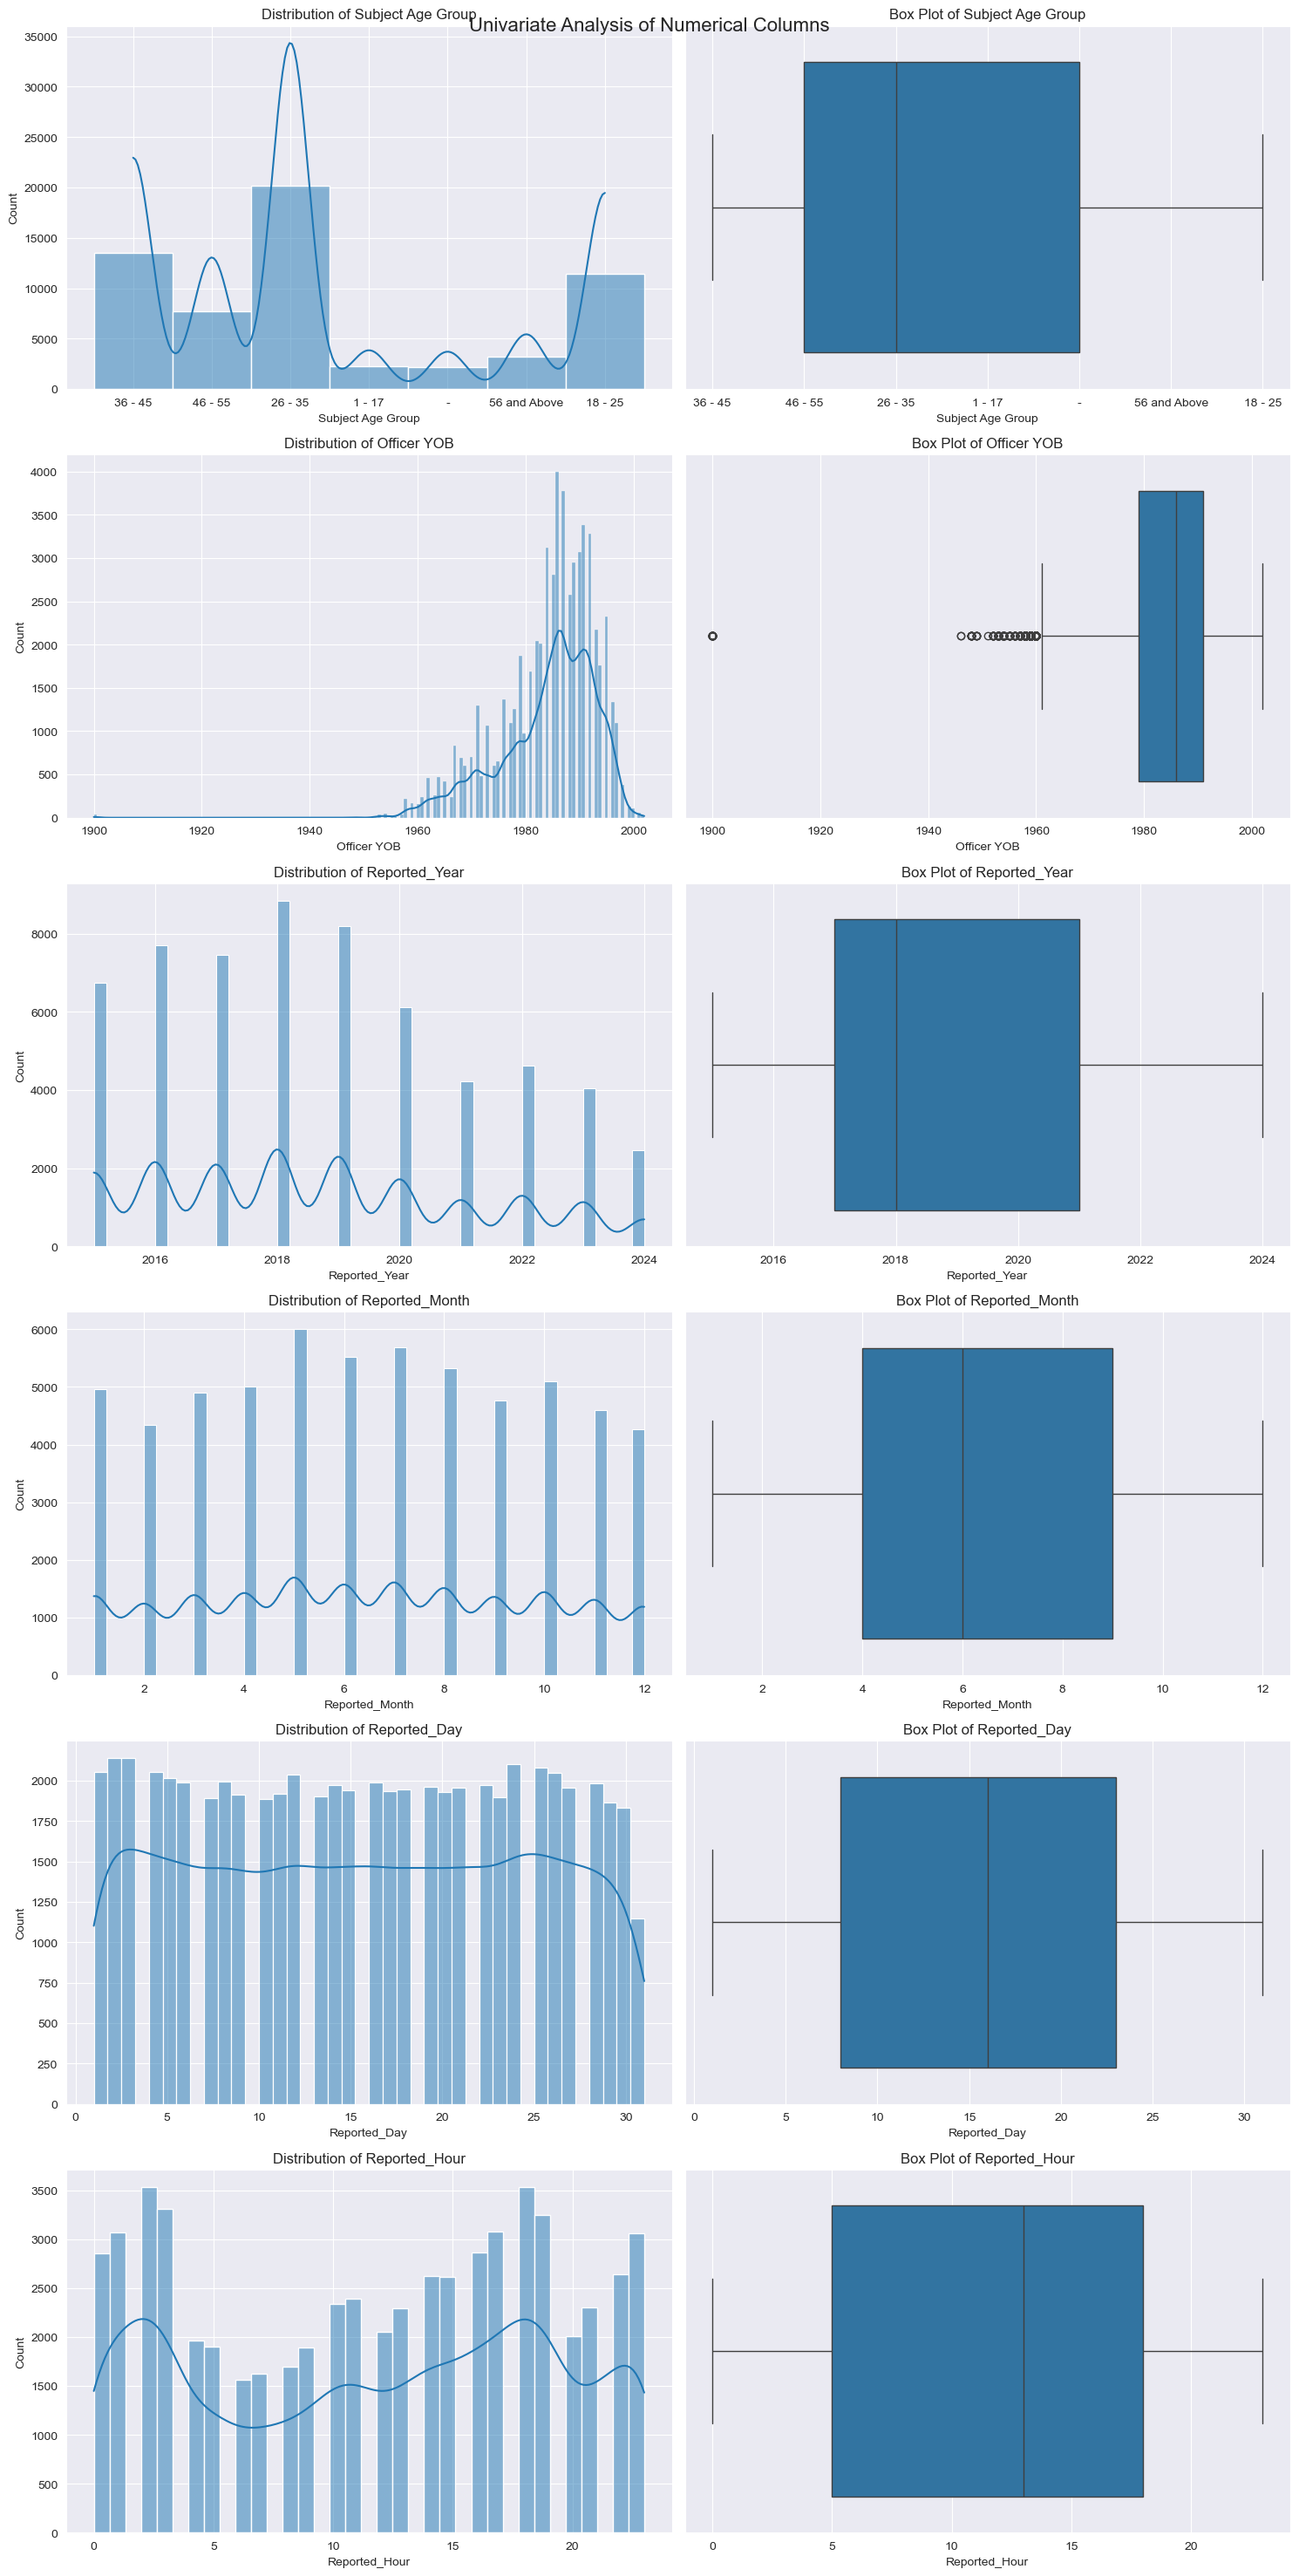

Summary Statistics for Numerical Columns:
        Officer YOB  Reported_Year  Reported_Month  Reported_Day  \
count  60460.000000   60460.000000    60460.000000  60460.000000   
mean    1984.215663    2018.720807        6.442177     15.676629   
std        9.055695       2.580154        3.333334      8.873755   
min     1900.000000    2015.000000        1.000000      1.000000   
25%     1979.000000    2017.000000        4.000000      8.000000   
50%     1986.000000    2018.000000        6.000000     16.000000   
75%     1991.000000    2021.000000        9.000000     23.000000   
max     2002.000000    2024.000000       12.000000     31.000000   

       Reported_Hour  
count   60460.000000  
mean       11.732021  
std         7.235558  
min         0.000000  
25%         5.000000  
50%        13.000000  
75%        18.000000  
max        23.000000  


In [434]:
# Numerical Columns Analysis
numerical_columns = ['Subject Age Group', 'Officer YOB', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour']

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 5*len(numerical_columns)))
fig.suptitle('Univariate Analysis of Numerical Columns', fontsize=16)

for i, col in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}')
    axes[i, 0].set_xlabel(col)
    
    # Box plot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

# Summary statistics for numerical columns
numerical_summary = df[numerical_columns].describe()
print("Summary Statistics for Numerical Columns:")
print(numerical_summary)

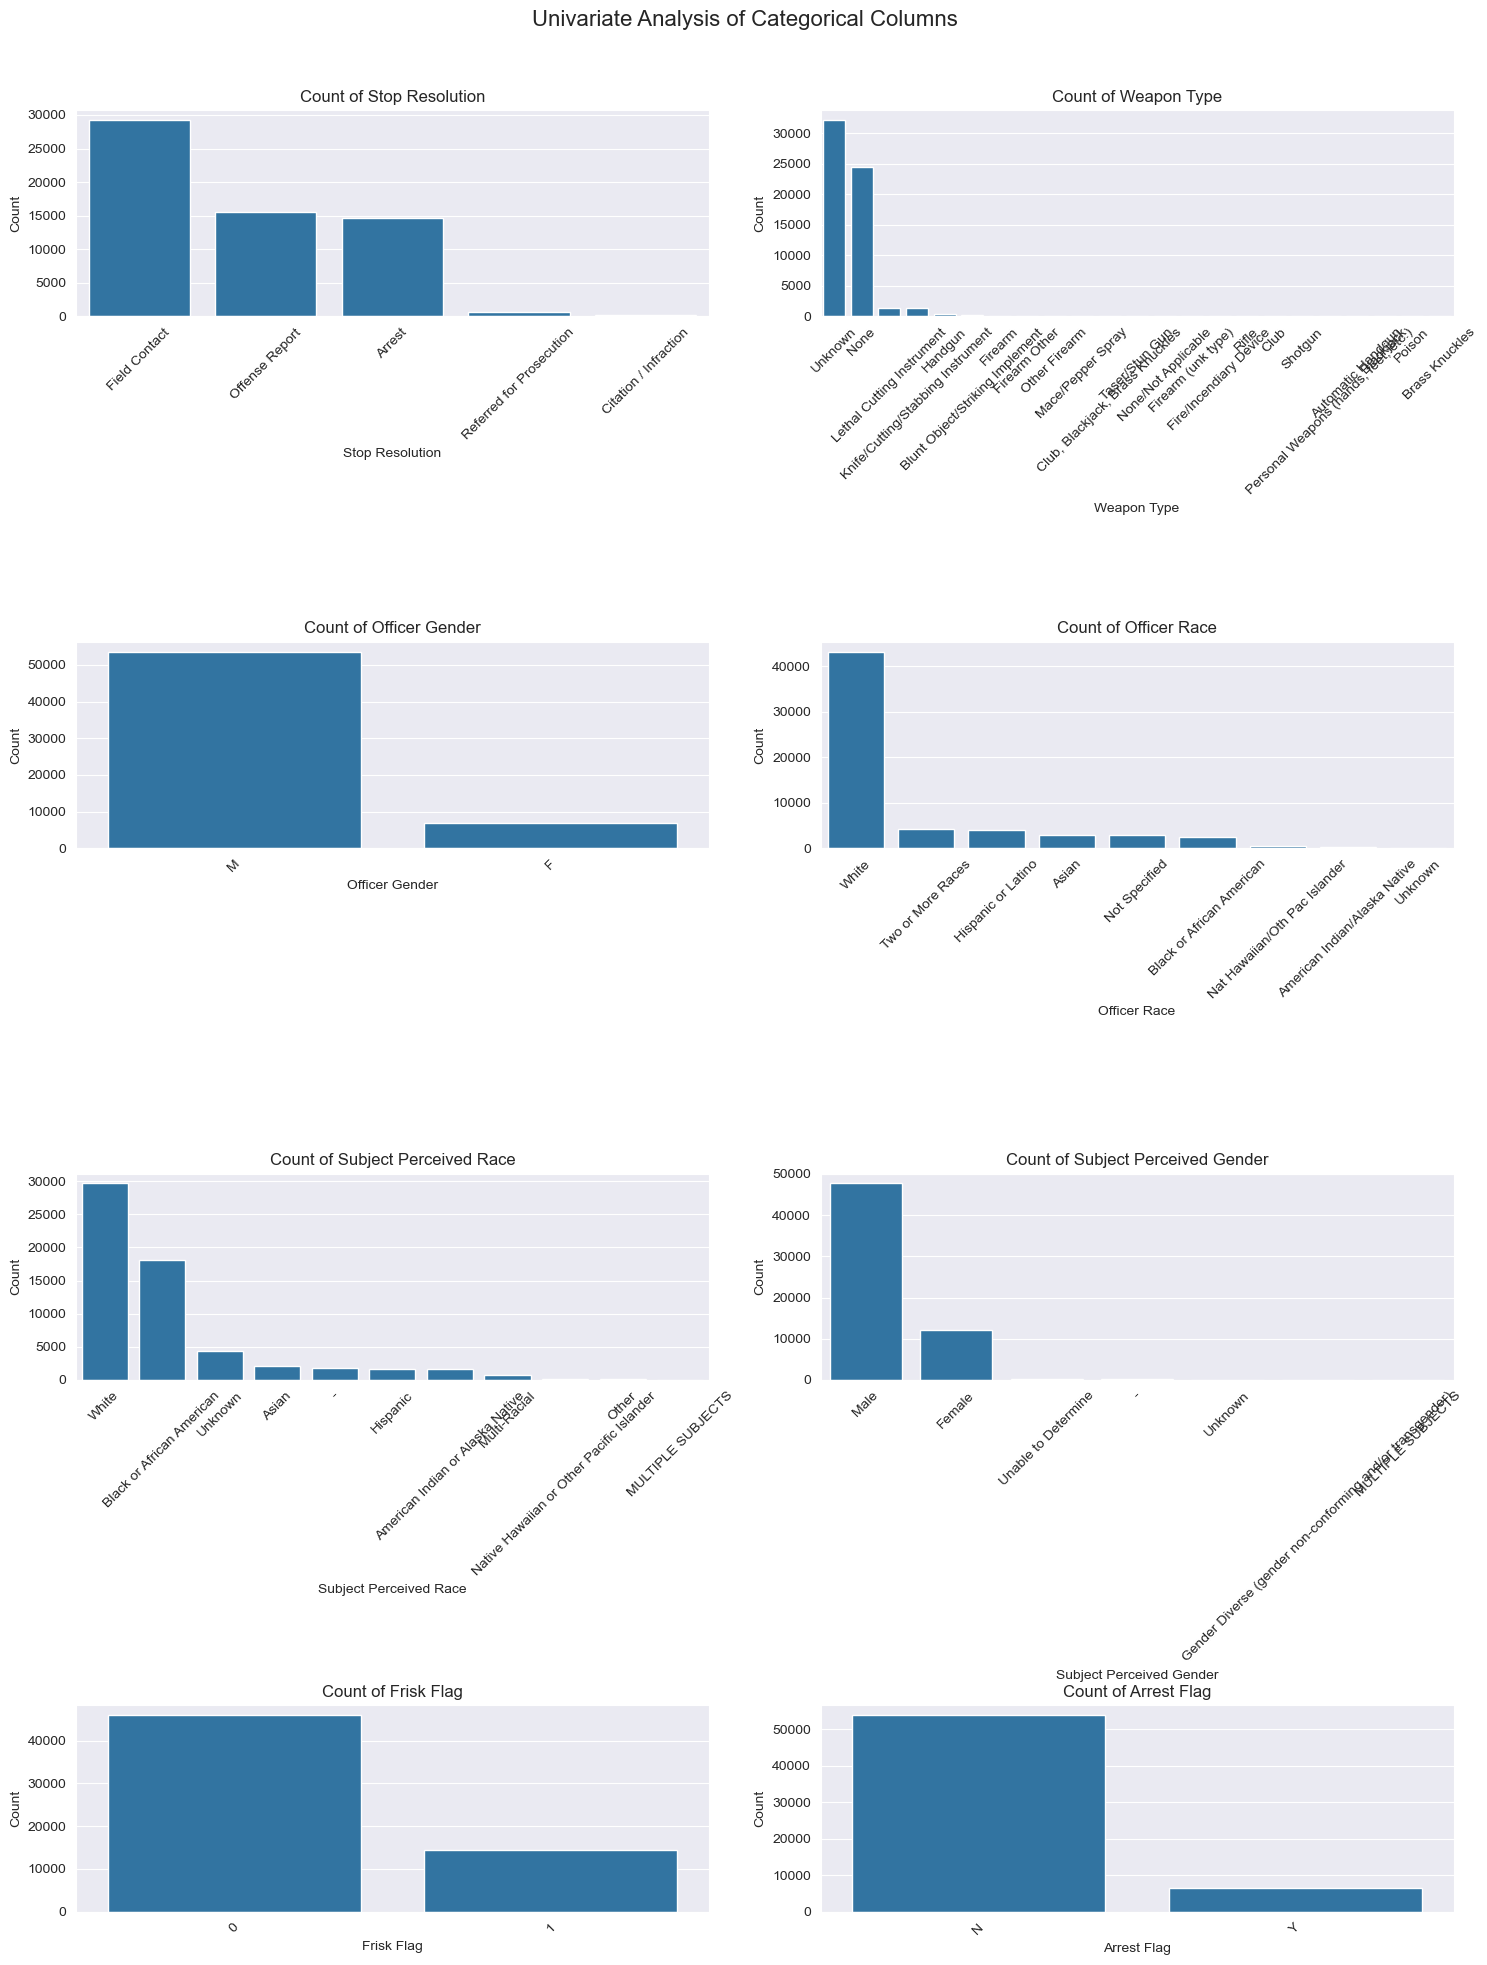

Summary Statistics for Categorical Columns:
       Stop Resolution Weapon Type Officer Gender Officer Race  \
count            60460       60460          60460        60460   
unique               5          23              2            9   
top      Field Contact     Unknown              M        White   
freq             29278       32208          53611        43277   

       Subject Perceived Race Subject Perceived Gender Arrest Flag  
count                   60460                    60460       60460  
unique                     11                        7           2  
top                     White                     Male           N  
freq                    29647                    47728       53910  


In [435]:
# Categorical Columns Analysis
categorical_columns = ['Stop Resolution', 'Weapon Type', 'Officer Gender',
                       'Officer Race', 'Subject Perceived Race',
                       'Subject Perceived Gender', 'Frisk Flag', 'Arrest Flag']

# Determine the grid size for subplots
n_cols = 2  # Number of columns for subplots
n_rows = (len(categorical_columns) + 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Univariate Analysis of Categorical Columns', fontsize=16)

# Flatten axes array if necessary for easy iteration
axes = axes.flatten()

# Create bar plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# If there are unused subplots, remove them
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjusting space for the suptitle
plt.show()

# Summary statistics for categorical columns
categorical_summary = df[categorical_columns].describe(include='object')
print("Summary Statistics for Categorical Columns:")
print(categorical_summary)


## 3.4 Bivariate Analysis

- **Correlation Analysis:** Explore the relationships between numerical features and visualize the correlation matrix and heatmap

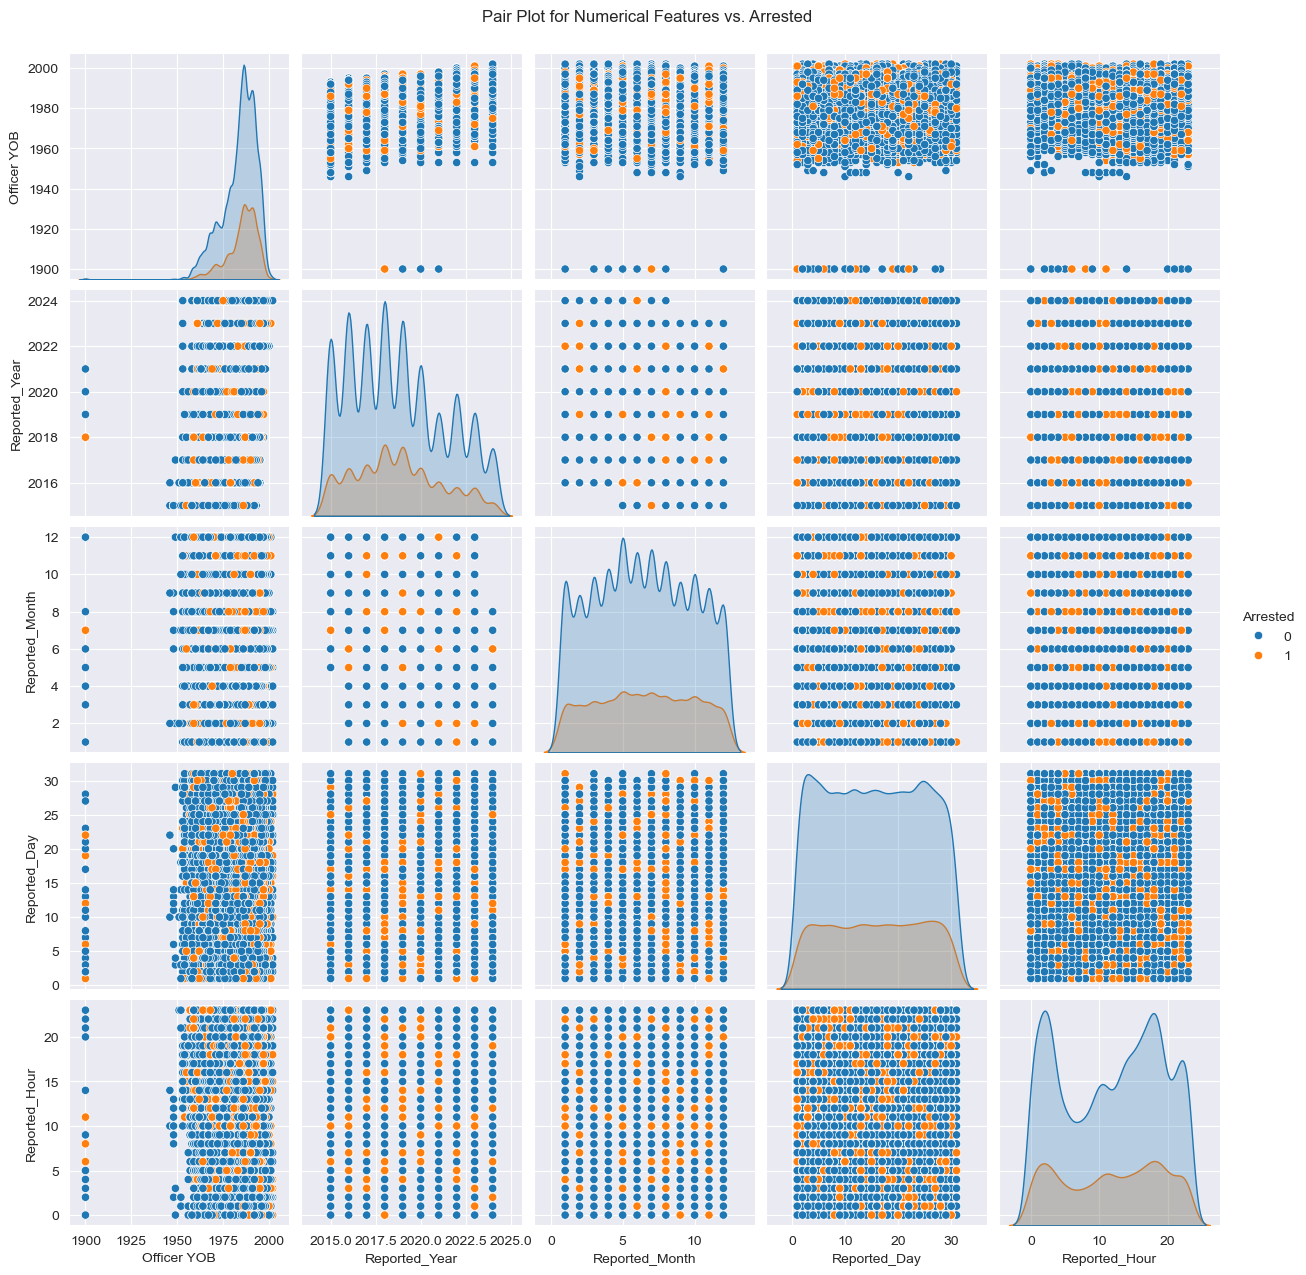

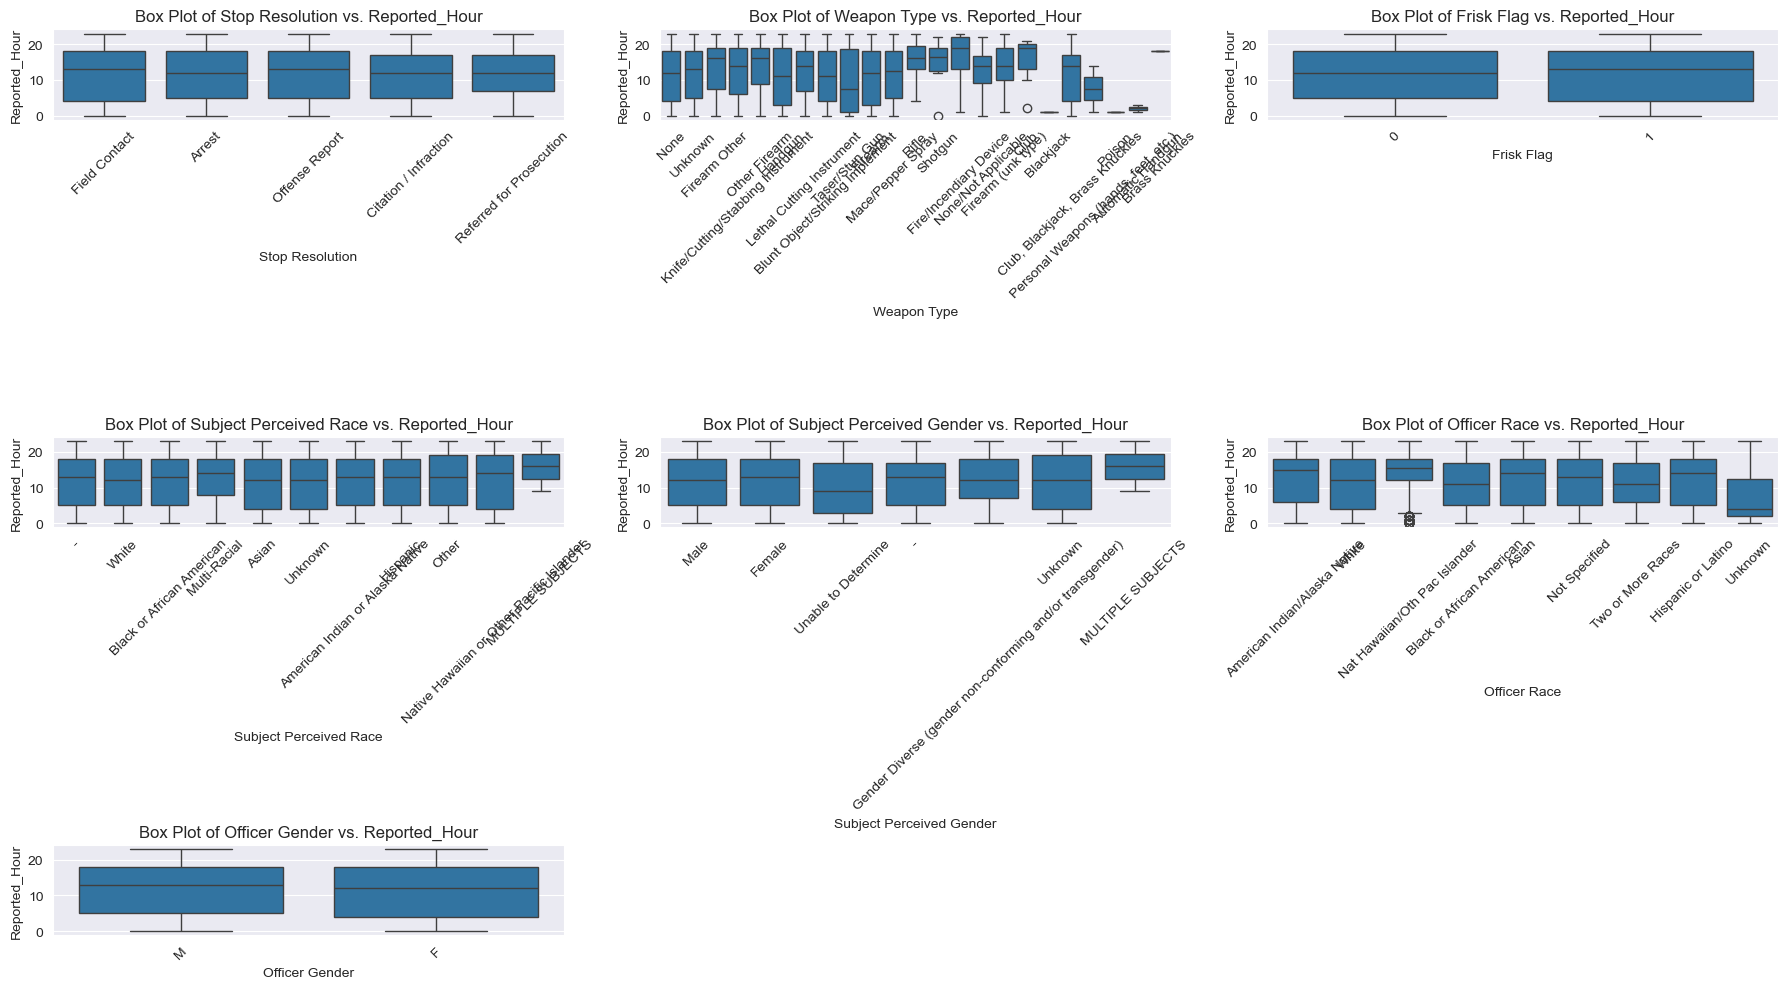

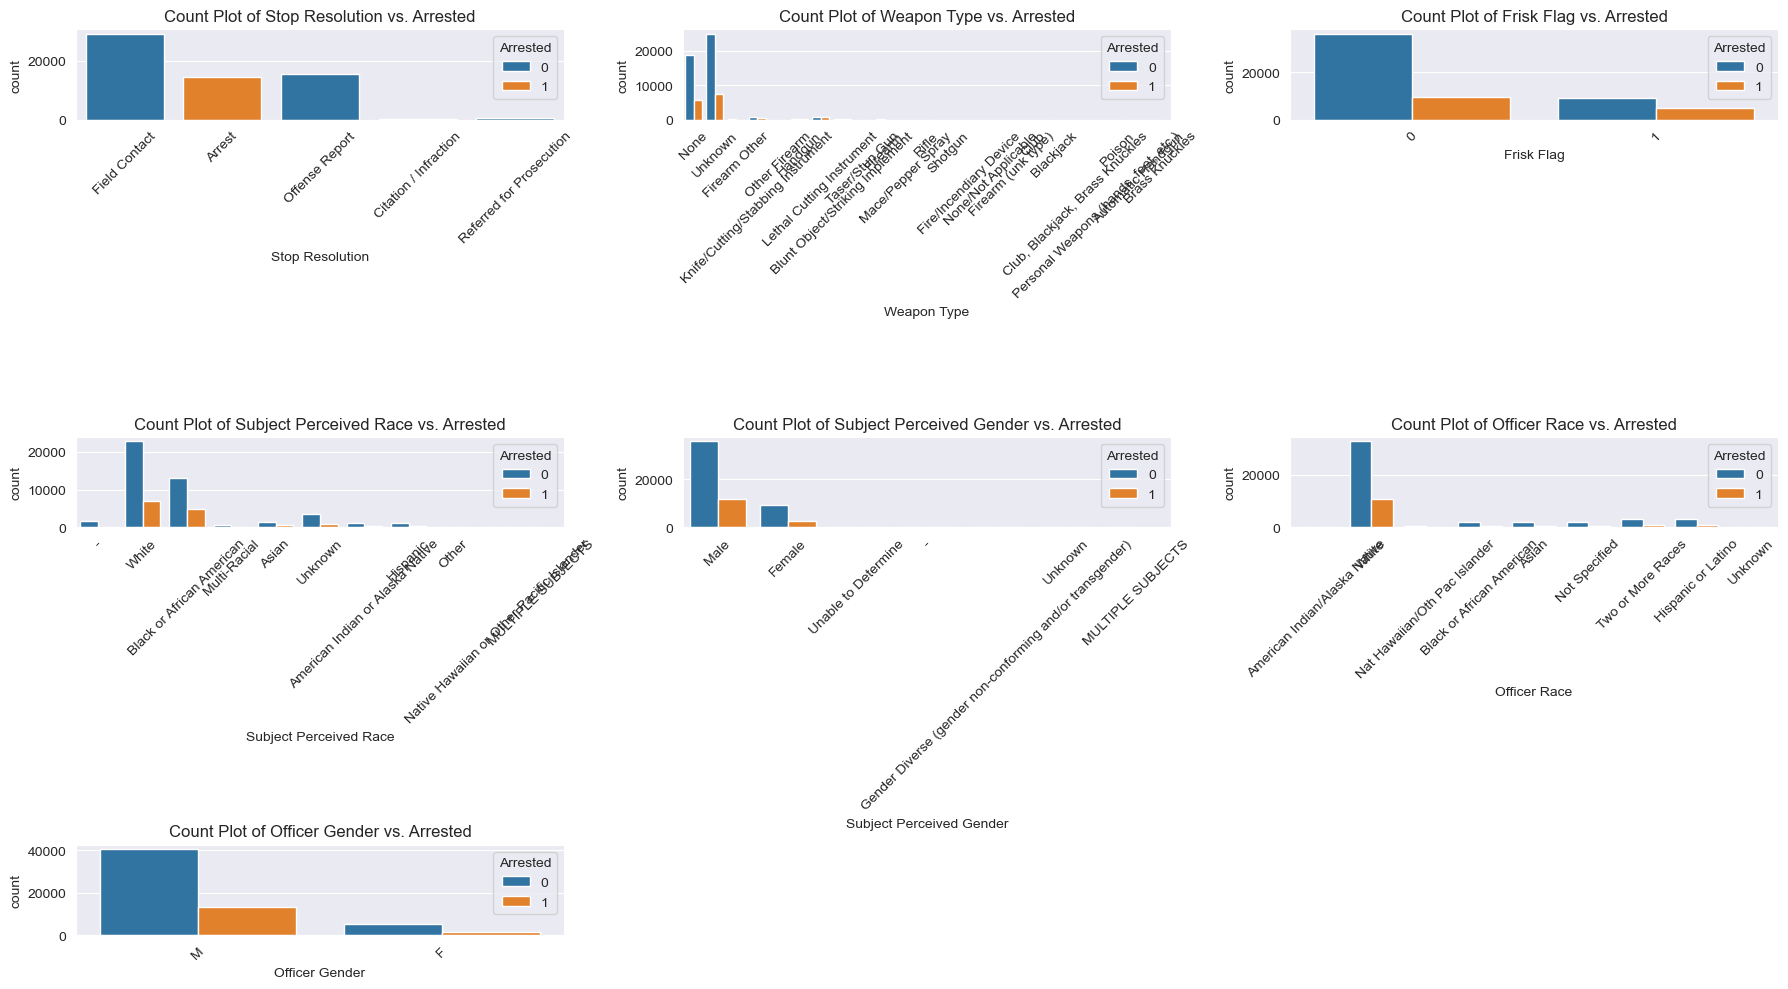

In [436]:


# List of columns to analyze
numerical_columns = ['Subject Age Group', 'Officer YOB', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour']
categorical_columns = ['Stop Resolution', 'Weapon Type', 'Frisk Flag', 'Subject Perceived Race', 'Subject Perceived Gender', 'Officer Race', 'Officer Gender']

# 1. Numerical vs. Numerical: Scatter Plots
sns.pairplot(df[numerical_columns + ['Arrested']], hue='Arrested', diag_kind='kde')
plt.suptitle("Pair Plot for Numerical Features vs. Arrested", y=1.02)
plt.show()

# 2. Categorical vs. Numerical: Box Plots
plt.figure(figsize=(18, 10))
for i, cat_col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=cat_col, y='Reported_Hour', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Box Plot of {cat_col} vs. Reported_Hour')
plt.tight_layout()
plt.show()

# 3. Categorical vs. Categorical: Bar Plots
plt.figure(figsize=(18, 10))
for i, cat_col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=cat_col, hue='Arrested', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {cat_col} vs. Arrested')
plt.tight_layout()
plt.show()


##  Checking for Outliers

In the outlier detection section of our project, we will identify and analyze any unusual or extreme values in our dataset that could distort our results or model performance. Outliers can arise from data entry errors, rare events, or natural variations in the data, and may significantly impact the accuracy and reliability of our predictive models.

By detecting and handling these outliers, we aim to ensure our analysis is robust, our models are accurate, and the insights we derive from the data are meaningful. We will use a combination of statistical methods and visualization techniques to identify, assess, and appropriately handle these outliers.

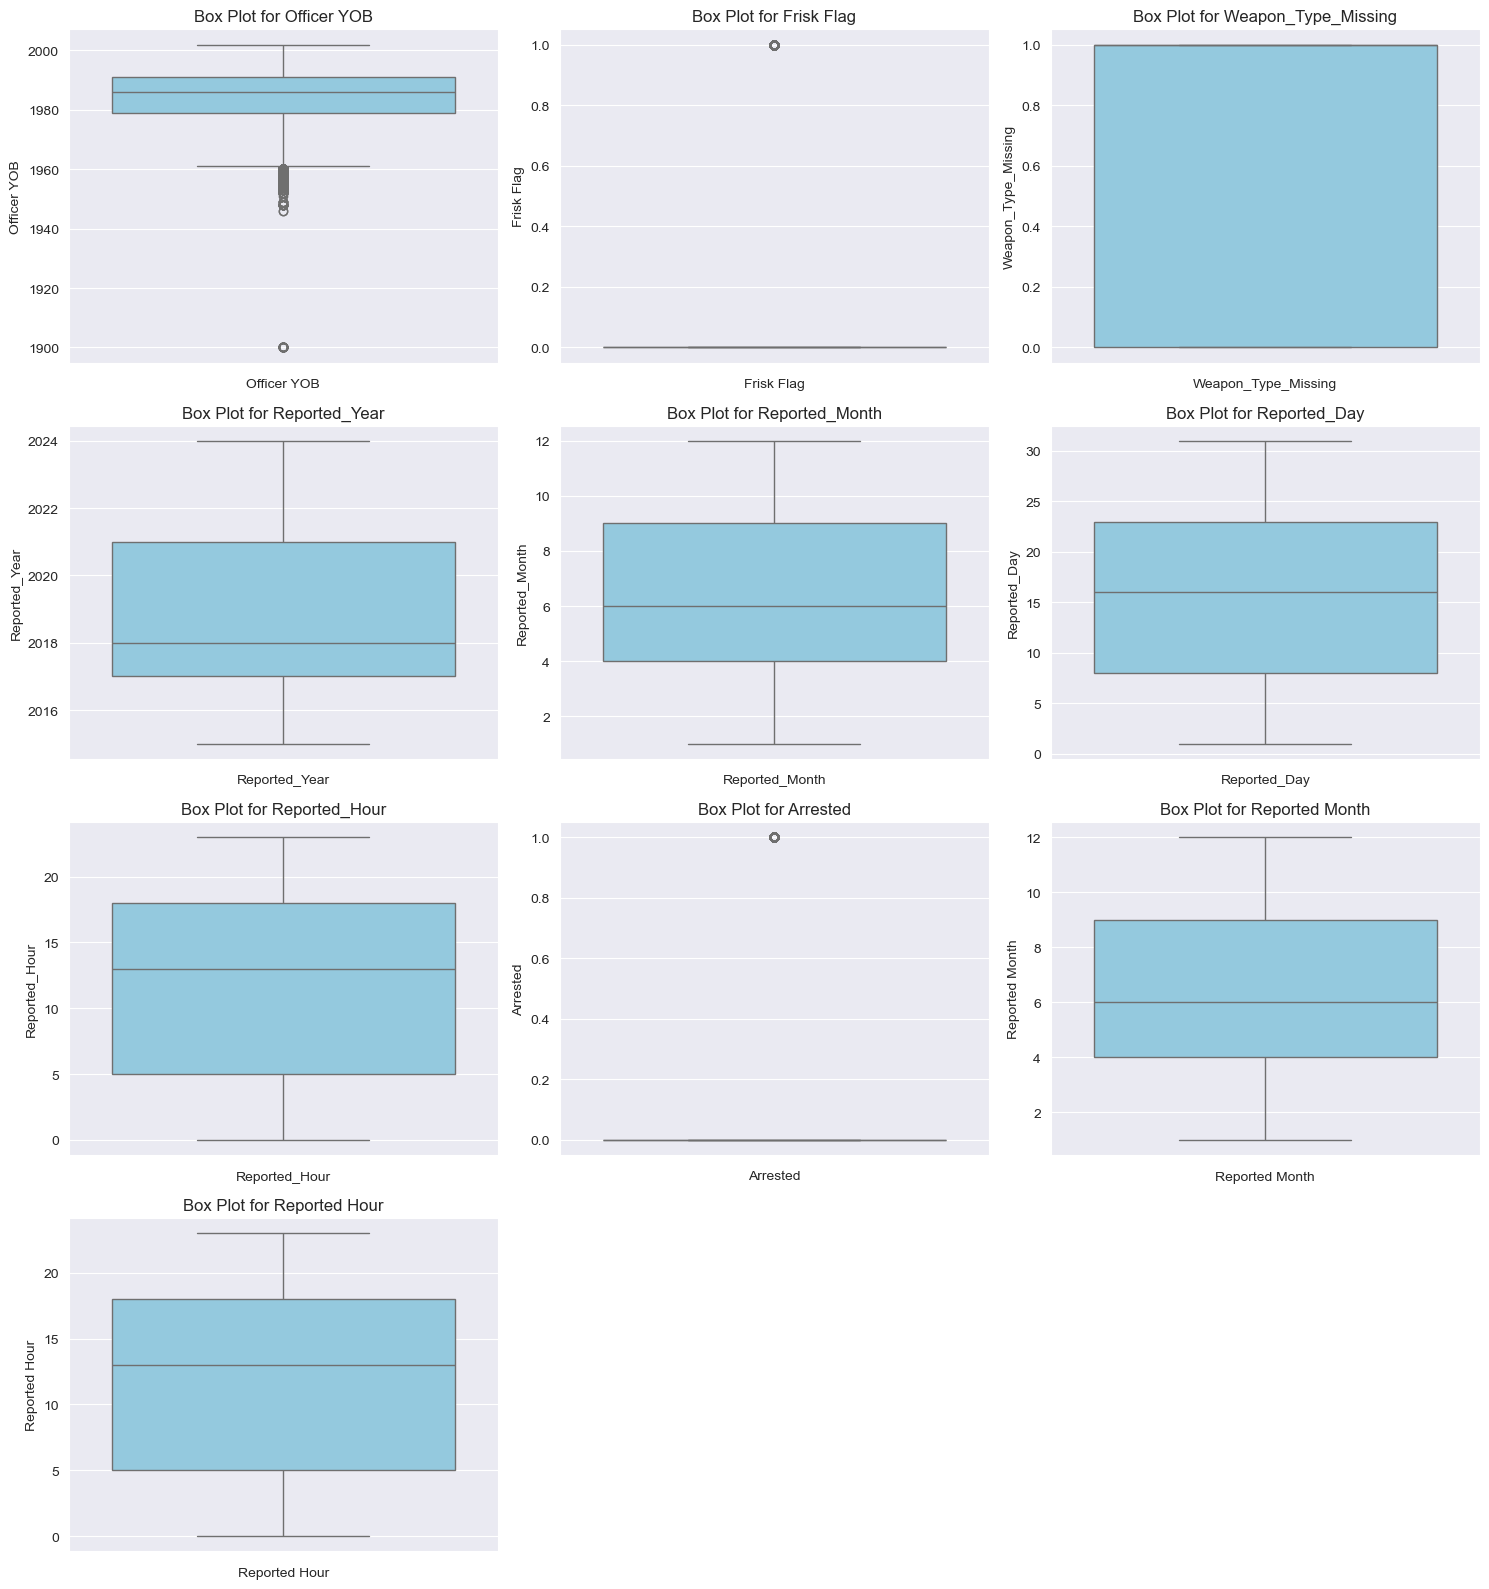

Outliers in Officer YOB using IQR method:
0        1957
25       1958
48       1959
49       1952
111      1960
         ... 
60676    1960
60782    1959
60863    1959
60903    1958
60952    1958
Name: Officer YOB, Length: 768, dtype: int64
Outliers in Frisk Flag using IQR method:
2        1
6        1
9        1
16       1
19       1
        ..
60993    1
60995    1
61002    1
61014    1
61016    1
Name: Frisk Flag, Length: 14472, dtype: int64
Outliers in Weapon_Type_Missing using IQR method:
Series([], Name: Weapon_Type_Missing, dtype: int32)
Outliers in Reported_Year using IQR method:
Series([], Name: Reported_Year, dtype: int32)
Outliers in Reported_Month using IQR method:
Series([], Name: Reported_Month, dtype: int32)
Outliers in Reported_Day using IQR method:
Series([], Name: Reported_Day, dtype: int32)
Outliers in Reported_Hour using IQR method:
Series([], Name: Reported_Hour, dtype: int32)
Outliers in Arrested using IQR method:
1        1
4        1
6        1
14       1
20    

In [437]:
# 1. Visualizing Outliers Using Box Plots

# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows and columns needed for subplots dynamically
n_cols = 3  # Number of columns for subplots
n_rows = int(np.ceil(len(numerical_columns) / n_cols))  # Number of rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Adjust the grid size based on the number of plots
    sns.boxplot(data=df[column], color='skyblue')
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Detecting Outliers Using the Interquartile Range (IQR) Method

outliers_iqr = {}

# Compute IQR for each numerical column and detect outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    outliers_iqr[column] = outliers

    # Print outliers detected
    print(f'Outliers in {column} using IQR method:')
    print(outliers)


### Observations and Deductions from Outlier Results

Based on the outlier detection results using the Interquartile Range (IQR) method for various columns in the dataset, here are some observations and deductions:

1. **`Officer YOB` (Year of Birth):**
   - **Outliers Detected:** 768 outliers.
   - **Description:** The outliers are lower values (e.g., 1952, 1957, 1958, 1959, 1960), indicating older officers.
   - **Possible Reason:** These years of birth suggest older officers compared to the general distribution. If most officers were born more recently, these older birth years are considered outliers.

2. **`Frisk Flag`:**
   - **Outliers Detected:** 14,472 outliers.
   - **Description:** All detected outliers are `1`s in this binary column (1 for "Yes", 0 for "No").
   - **Possible Reason:** The distribution is likely highly imbalanced, with more `0`s than `1`s. The IQR method flags `1`s as outliers due to their lower frequency.

3. **`Weapon_Type_Missing`:**
   - **Outliers Detected:** None.
   - **Description:** This binary column (0 or 1) has no extreme values outside the expected range.
   - **Possible Reason:** The values are within a normal range for binary data, hence no outliers detected.

4. **`Reported_Year`, `Reported_Month`, `Reported_Day`, `Reported_Hour`:**
   - **Outliers Detected:** None.
   - **Description:** No outliers detected for these time-related columns.
   - **Possible Reason:** The data in these columns likely falls within consistent and expected ranges (e.g., valid years, months, days, and hours).

5. **`Arrested`:**
   - **Outliers Detected:** 14,690 outliers.
   - **Description:** All detected outliers are `1`s in this binary column.
   - **Possible Reason:** Similar to `Frisk Flag`, this column is likely imbalanced, with the majority being `0`s, causing `1`s to be detected as outliers.

6. **`PCA1` and `PCA2` (Principal Component Analysis Components):**
   - **`PCA1` Outliers Detected:** 83 extreme negative values.
   - **`PCA2` Outliers Detected:** 4 extreme positive values.
   - **Possible Reason:** These outliers indicate data points that differ significantly from others in the reduced-dimensional space, potentially representing unique or influential cases.

### Key Deductions:

- **Imbalanced Data in Binary Columns (`Frisk Flag`, `Arrested`):**  
  Outliers detected are due to the imbalanced nature of the data. Proper handling, such as resampling or using algorithms that account for class imbalance, is recommended instead of removing these outliers.

- **Age-Related Outliers in `Officer YOB`:**  
  The outliers represent a group of older officers. Further investigation is needed to determine if these should be treated differently or provide valuable insights.

- **No Outliers in Most Time-Related Columns:**  
  The absence of outliers in `Reported_Year`, `Reported_Month`, `Reported_Day`, and `Reported_Hour` suggests these features are well-distributed and can be safely used in modeling.

- **Potentially Influential Points in PCA Components:**  
  The outliers in PCA components might represent significant or unique data points. Further analysis is necessary to decide if they are errors or valuable for understanding unique patterns.

### Conclusion:

- **Handle Binary Column Outliers Carefully:** Address imbalances rather than simply removing outliers.
- **Investigate `Officer YOB` Outliers:** Examine these outliers further to decide on special treatment.
- **Leverage PCA Outliers for Insights:** Analyze PCA outliers to determine their significance in the dataset.


## 4. Feature Engineering



In [438]:
import pandas as pd

# Check which columns are currently in the DataFrame
print("Current columns in the DataFrame:")
print(df.columns.tolist())

# Drop the columns from the DataFrame if they exist
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Verify that the columns have been dropped by displaying the remaining columns
print("\nRemaining columns in the DataFrame after dropping:")
print(df.columns.tolist())

# Updated list of columns to be used later in modeling
columns_for_modeling =['Stop Resolution', 'Weapon Type', 'Frisk Flag', 'Subject Perceived Race', 'Subject Perceived Gender', 'Officer Race', 'Officer Gender'] # Corrected to 'Age Group'

# Select only the necessary columns for modeling
df_modeling = df[columns_for_modeling + ['Arrested']]  # Include 'Arrested' as the target variable

# Apply One-Hot Encoding to categorical variables
categorical_columns = ['Stop Resolution', 'Weapon Type', 'Frisk Flag', 'Subject Perceived Race', 'Subject Perceived Gender', 'Officer Race', 'Officer Gender']

# One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df_modeling, columns=categorical_columns, drop_first=True)

# Verify the encoded DataFrame for modeling
print("\nEncoded DataFrame for modeling:")
print(df_encoded.head())

print("\nColumns used for modeling after encoding:")
print(df_encoded.columns.tolist())


Current columns in the DataFrame:
['Subject Age Group', 'Stop Resolution', 'Weapon Type', 'Officer YOB', 'Officer Gender', 'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender', 'Arrest Flag', 'Frisk Flag', 'Weapon_Type_Missing', 'Weapon_Precinct_Interaction', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour', 'Age Group', 'Arrested', 'Reported Month', 'Reported Hour']

Remaining columns in the DataFrame after dropping:
['Subject Age Group', 'Stop Resolution', 'Weapon Type', 'Officer YOB', 'Officer Gender', 'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender', 'Arrest Flag', 'Frisk Flag', 'Weapon_Type_Missing', 'Weapon_Precinct_Interaction', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour', 'Age Group', 'Arrested', 'Reported Month', 'Reported Hour']

Encoded DataFrame for modeling:
   Arrested  Stop Resolution_Citation / Infraction  \
0         0                                  False   
1         1                      

Let's get dummies for our categorical columns


In [439]:
import pandas as pd

# List of categorical columns
categorical_columns = [
    'Stop Resolution', 
    'Weapon Type', 
    'Frisk Flag', 
    'Subject Perceived Race', 
    'Subject Perceived Gender', 
    'Officer Race', 
    'Officer Gender'
]

# Perform one-hot encoding on the specified categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the transformed DataFrame
print(df_encoded.head())


  Subject Age Group  Officer YOB Arrest Flag  Weapon_Type_Missing  \
0           36 - 45         1957           N                    0   
1           46 - 55         1971           Y                    0   
2           26 - 35         1984           N                    1   
3            1 - 17         1962           N                    1   
4           36 - 45         1982           Y                    0   

  Weapon_Precinct_Interaction  Reported_Year  Reported_Month  Reported_Day  \
0                      -_West           2019               8            24   
1                     -_North           2019               6             7   
2                   Unknown_-           2017               7             7   
3           Unknown_Southwest           2018               8            20   
4                 -_Southwest           2022              10             1   

   Reported_Hour Age Group  ...  Subject Perceived Gender_Unknown  \
0             10        36  ...                

In [440]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'df' is your DataFrame
# and 'Arrested' is your target variable

# Separate features and target
X = df.drop('Arrested', axis=1)
y = df['Arrested']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with the preprocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
X_encoded = pipeline.fit_transform(X)

# The encoded X is now ready for modeling
print(X_encoded.shape)

df.head()

(60460, 198)


,Subject Age Group,Stop Resolution,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Arrest Flag,Frisk Flag,Weapon_Type_Missing,Weapon_Precinct_Interaction,Reported_Year,Reported_Month,Reported_Day,Reported_Hour,Age Group,Arrested,Reported Month,Reported Hour
0,36 - 45,Field Contact,None,1957,M,American Indian/Alaska Native,-,Male,N,0,0,-_West,2019,8,24,10,36,0,8,10
1,46 - 55,Arrest,None,1971,M,White,White,Male,Y,0,0,-_North,2019,6,7,17,46,1,6,17
2,26 - 35,Field Contact,Unknown,1984,F,White,White,Male,N,1,1,Unknown_-,2017,7,7,17,26,0,7,17
3,1 - 17,Offense Report,Unknown,1962,M,White,Black or African American,Female,N,0,1,Unknown_Southwest,2018,8,20,11,1,0,8,11
4,36 - 45,Arrest,None,1982,M,Nat Hawaiian/Oth Pac Islander,White,Male,Y,0,0,-_Southwest,2022,10,1,22,36,1,10,22


## 5. Data Preparation for Modelling

**5.1 Feature Scaling**


**Objective:** Feature scaling is a crucial preprocessing step in preparing data for machine learning models. The purpose of feature scaling is to standardize the range of independent variables or features of data. It ensures that all features contribute equally to the model's learning process, regardless of their original scale. By transforming numerical features to a common scale, we improve model convergence and performance, especially for algorithms that are sensitive to the scale of data, such as Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), and Neural Networks.

In our data, feature scaling will help mitigate the impact of outliers and bring all numerical columns to a comparable scale, enhancing the stability and accuracy of our predictive models. We'll employ robust scaling techniques to manage the influence of extreme values effectively.

In [441]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Assuming df is your DataFrame

# Define the numerical columns that need to be scaled
numerical_columns = ['Officer YOB', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour']



# Step 1: Identify and handle non-numeric values in numerical columns
# Replace non-numeric values with NaN
df[numerical_columns] = df[numerical_columns].replace('-', np.nan)

# Convert columns to numeric, coercing errors to NaN
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Step 2: Handle missing values (if any) after conversion
# Fill missing values with the median of each column
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Create a copy of the original dataframe to store scaled features
df_scaled = df.copy()

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Step 3: Apply different scalers to the numerical features
# Standard Scaler
df_scaled[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])
print("\nStandard Scaled DataFrame:")
print(df_scaled[numerical_columns].head())

# MinMax Scaler
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(df[numerical_columns])
print("\nMinMax Scaled DataFrame:")
print(df_minmax_scaled[numerical_columns].head())

# Robust Scaler
df_robust_scaled = df.copy()
df_robust_scaled[numerical_columns] = robust_scaler.fit_transform(df[numerical_columns])
print("\nRobust Scaled DataFrame:")
print(df_robust_scaled[numerical_columns].head())

# You can choose the scaled DataFrame that best suits your model needs
# Example: If you decide to use the robust scaling
X = df_robust_scaled.drop('Arrested', axis=1)  # Replace 'Arrested' with your target column name
y = df_robust_scaled['Arrested']  # Replace 'Arrested' with your target column name



Standard Scaled DataFrame:
   Officer YOB  Reported_Year  Reported_Month  Reported_Day  Reported_Hour
0    -3.005389       0.108209        0.467351      0.937984      -0.239378
1    -1.459388       0.108209       -0.132654     -0.977794       0.728074
2    -0.023815      -0.666945        0.167348     -0.977794       0.728074
3    -2.453246      -0.279368        0.467351      0.487213      -0.101171
4    -0.244673       1.270940        1.067356     -1.653950       1.419112

MinMax Scaled DataFrame:
   Officer YOB  Reported_Year  Reported_Month  Reported_Day  Reported_Hour
0     0.558824       0.444444        0.636364      0.766667       0.434783
1     0.696078       0.444444        0.454545      0.200000       0.739130
2     0.823529       0.222222        0.545455      0.200000       0.739130
3     0.607843       0.333333        0.636364      0.633333       0.478261
4     0.803922       0.777778        0.818182      0.000000       0.956522

Robust Scaled DataFrame:
   Officer YOB  Repo

**5.2 Correlation Analysis**

To compute and visualize the correlation between numerical features, we use a correlation matrix and a heatmap.# Compute the correlation matrix

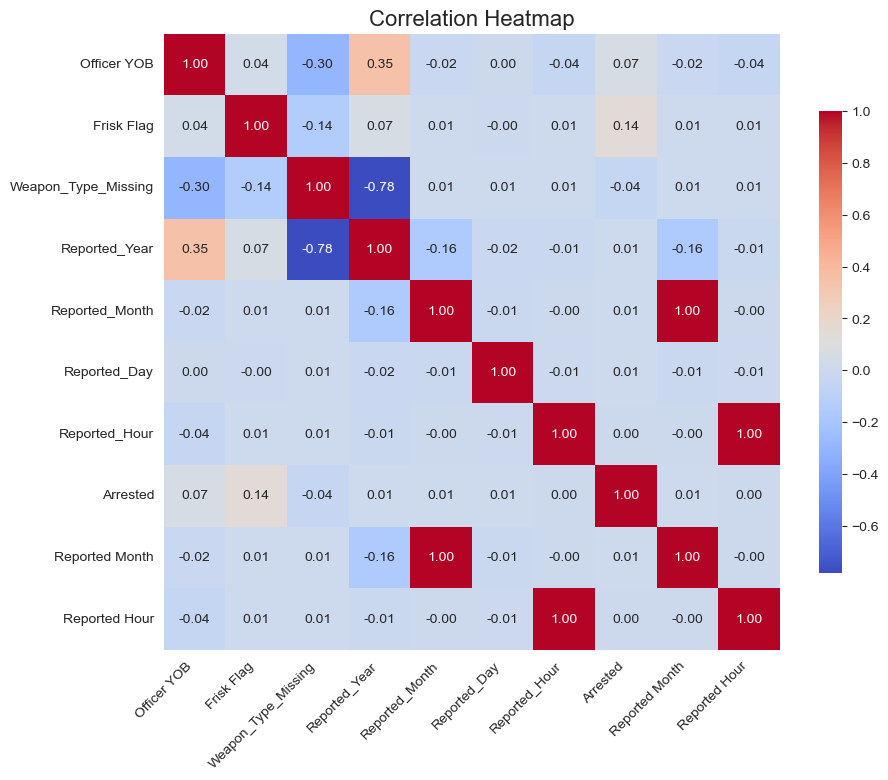

In [442]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Step 4: Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .75})

# Step 5: Add titles and labels for better readability
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### Heatmap Purpose:
A correlation heatmap visually represents the correlation matrix.  
It shows how variables relate to each other (linearly) within a dataset.  
Color coding indicates the strength and direction of correlations.  

### Color Legend:
- **Shades of blue**: Positive correlations (values close to 1).
- **Shades of red**: Negative correlations (values close to -1).
- **White**: No correlation (values close to 0).

### Variables Analyzed:
- Axes represent variables (both horizontal and vertical).
- Examples: `Officer YOB`, `Weapon_Type_Missing`, `Reported_Year`, etc.

### Observations:
- **Strong positive correlation**:
  - `Reported_Year` with itself (expected).
- **Strong negative correlation**:
  - `Weapon_Type_Missing` and `Arrested`.
  - Missing weapon type → Less likely to be arrested.
- **Weak or no correlations**:
  - `Officer YOB` with `Subject Perceived Race`.
  - These variables don’t directly influence each other.

### Implications:
Policymakers can use this data:
- Understand relationships (e.g., missing weapon info affecting arrests).
- Investigate biases or patterns.


## 5.3 Data Splitting for Training and Testing

To prepare our data for modeling, we'll follow these steps:

1. **Feature Selection**:
   - We'll define our features (independent variables) and store them in a variable called **X**.
   - These features represent the input variables that we'll use to predict the target variable.

2. **Target Variable Definition**:
   - Our target variable (dependent variable) is whether a customer has exited (churned) or not.
   - We'll store this target variable in a variable called **y**.

3. **Data Splitting**:
   - We'll split our dataset into training and testing subsets.
   - The training set will be used to train our machine learning model.
   - The testing set will be used to evaluate the model's performance.



In [443]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Define the numerical columns that need to be scaled
numerical_columns = ['Subject Age Group', 'Officer YOB', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour']

# Define the categorical columns that need to be one-hot encoded
categorical_columns = ['Stop Resolution', 'Weapon Type', 'Frisk Flag', 'Subject Perceived Race', 'Subject Perceived Gender', 'Officer Race', 'Officer Gender']

# Step 1: Identify and handle non-numeric values in numerical columns
# Replace non-numeric values with NaN
df[numerical_columns] = df[numerical_columns].replace('-', np.nan)

# Convert columns to numeric, coercing errors to NaN
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Step 2: Handle missing values (if any) after conversion
# Fill missing values with the median of each column
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Step 3: Apply Robust Scaler for Numerical Features
scaler = RobustScaler()

# Fit and transform the numerical columns
df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 4: Check if categorical columns are present in the DataFrame
missing_columns = [col for col in categorical_columns if col not in df_scaled.columns]
if missing_columns:
    print(f"Warning: The following categorical columns are not present in the DataFrame and will be ignored: {missing_columns}")

# Filter categorical columns to only those present in the DataFrame
categorical_columns = [col for col in categorical_columns if col in df_scaled.columns]

# Step 5: One-Hot Encode Categorical Columns that are present
df_encoded = pd.get_dummies(df_scaled, columns=categorical_columns)

# Step 6: Separate the features and the target variable
feature_columns = df_encoded.columns.drop('Arrested')  # Exclude the target column 'Arrested'
X = df_encoded[feature_columns]
y = df_encoded['Arrested']  # Target variable

# Step 7: Perform data splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

# Verify class distribution in training and testing sets
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))


Training set shape: (48368, 71)
Testing set shape: (12092, 71)
Training target shape: (48368,)
Testing target shape: (12092,)

Class distribution in training set:
Arrested
0    0.756657
1    0.243343
Name: proportion, dtype: float64

Class distribution in testing set:
Arrested
0    0.758518
1    0.241482
Name: proportion, dtype: float64


## 6 Model Training and Evaluation

Objective: Develop, train, and evaluate predictive models to determine the likelihood of an arrest following a Terry Stop.

**6.1 Feature Scaling:** We'll apply feature scaling to the numerical features to improve the performance of our model.

In [444]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame with the necessary data

# Define the numerical columns that need to be scaled
numerical_columns = ['Officer YOB', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour']

# Step 1: Handle non-numeric values in numerical columns
# Replace non-numeric values with NaN
df[numerical_columns] = df[numerical_columns].replace('-', np.nan)

# Convert columns to numeric, coercing errors to NaN
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Step 2: Handle missing values (if any) after conversion
# Fill missing values with the median of each column
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Step 3: Remove outliers (if this is part of your preprocessing)
# Assuming you have a function to remove outliers, use it here
# clean_data_no_outliers = remove_outliers_function(df)

# For illustration, let's assume clean_data_no_outliers is a copy of df with outliers removed
clean_data_no_outliers = df.copy()  # Replace this with actual outlier removal logic

# Step 4: Feature Scaling
scaler = StandardScaler()

# Apply feature scaling to the numerical features
clean_data_no_outliers[numerical_columns] = scaler.fit_transform(clean_data_no_outliers[numerical_columns])

# Print scaled data to verify
print("\nScaled DataFrame:")
print(clean_data_no_outliers[numerical_columns].head())

# Now clean_data_no_outliers contains the scaled numerical data



Scaled DataFrame:
   Officer YOB  Reported_Year  Reported_Month  Reported_Day  Reported_Hour
0    -3.005389       0.108209        0.467351      0.937984      -0.239378
1    -1.459388       0.108209       -0.132654     -0.977794       0.728074
2    -0.023815      -0.666945        0.167348     -0.977794       0.728074
3    -2.453246      -0.279368        0.467351      0.487213      -0.101171
4    -0.244673       1.270940        1.067356     -1.653950       1.419112


**6.1 Logistic Regression**

In [469]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or DataFrame containing your data
# df = pd.read_csv('your_dataset.csv')

# Example setup - assuming df is already loaded and contains relevant features
# For demonstration purposes, let's define df with random data (replace this with your actual DataFrame)
df = pd.DataFrame({
    'Officer YOB': np.random.randint(1950, 2000, 100),
    'Reported_Year': np.random.randint(2010, 2023, 100),
    'Reported_Month': np.random.randint(1, 13, 100),
    'Reported_Day': np.random.randint(1, 32, 100),
    'Reported_Hour': np.random.randint(0, 24, 100),
    'Stop Resolution': np.random.choice(['Resolved', 'Not Resolved'], 100),
    'Weapon Type': np.random.choice(['None', 'Firearm', 'Knife', 'Other'], 100),
    'Frisk Flag': np.random.choice(['Yes', 'No'], 100),
    'Subject Perceived Race': np.random.choice(['White', 'Black', 'Hispanic', 'Other'], 100),
    'Subject Perceived Gender': np.random.choice(['Male', 'Female', 'Other'], 100),
    'Officer Race': np.random.choice(['White', 'Black', 'Asian', 'Other'], 100),
    'Officer Gender': np.random.choice(['Male', 'Female'], 100),
    'Arrested': np.random.choice([0, 1], 100)  # Binary target variable
})

# Define feature columns and target variable
feature_columns = ['Officer YOB', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour',
                   'Stop Resolution', 'Weapon Type', 'Frisk Flag', 'Subject Perceived Race',
                   'Subject Perceived Gender', 'Officer Race', 'Officer Gender']
target_column = 'Arrested'

# Separate features and target
X = df[feature_columns]
y = df[target_column]

# Define categorical and numerical columns
categorical_features = ['Stop Resolution', 'Weapon Type', 'Frisk Flag', 'Subject Perceived Race',
                         'Subject Perceived Gender', 'Officer Race', 'Officer Gender']
numerical_features = ['Officer YOB', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour']

# Create transformers for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = 'passthrough'

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that first transforms the data and then fits the Logistic Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model using the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6500
Precision: 0.3333
Recall: 0.7500
F1 Score: 0.4615

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.62      0.74        16
           1       0.33      0.75      0.46         4

    accuracy                           0.65        20
   macro avg       0.62      0.69      0.60        20
weighted avg       0.79      0.65      0.68        20


Confusion Matrix:
 [[10  6]
 [ 1  3]]


**6.2 Decision Tree**

In [470]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Step 1: Prepare your data
# Assuming 'df' is your DataFrame and 'Arrested' is the target variable

# Separate features (X) and target (y)
X = df.drop(columns=['Arrested'])  # Drop the target column from the features
y = df['Arrested']  # Target column

# One-Hot Encoding categorical features
X = pd.get_dummies(X, drop_first=True)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 6: Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7000
Precision: 0.6667
Recall: 0.5000
F1 Score: 0.5714

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.67      0.50      0.57         8

    accuracy                           0.70        20
   macro avg       0.69      0.67      0.67        20
weighted avg       0.70      0.70      0.69        20


Confusion Matrix:
[[10  2]
 [ 4  4]]


In [480]:

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or DataFrame containing your data
# df = pd.read_csv('your_dataset.csv')

# Example setup - assuming df is already loaded and contains relevant features
# For demonstration purposes, let's define df with random data (replace this with your actual DataFrame)
df = pd.DataFrame({
    'Officer YOB': np.random.randint(1950, 2000, 100),
    'Reported_Year': np.random.randint(2010, 2023, 100),
    'Reported_Month': np.random.randint(1, 13, 100),
    'Reported_Day': np.random.randint(1, 32, 100),
    'Reported_Hour': np.random.randint(0, 24, 100),
    'Stop Resolution': np.random.choice(['Resolved', 'Not Resolved'], 100),
    'Weapon Type': np.random.choice(['None', 'Firearm', 'Knife', 'Other'], 100),
    'Frisk Flag': np.random.choice(['Yes', 'No'], 100),
    'Subject Perceived Race': np.random.choice(['White', 'Black', 'Hispanic', 'Other'], 100),
    'Subject Perceived Gender': np.random.choice(['Male', 'Female', 'Other'], 100),
    'Officer Race': np.random.choice(['White', 'Black', 'Asian', 'Other'], 100),
    'Officer Gender': np.random.choice(['Male', 'Female'], 100),
    'Arrested': np.random.choice([0, 1], 100)  # Binary target variable
})

# Define feature columns and target variable
feature_columns = ['Officer YOB', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour',
                   'Stop Resolution', 'Weapon Type', 'Frisk Flag', 'Subject Perceived Race',
                   'Subject Perceived Gender', 'Officer Race', 'Officer Gender']
target_column = 'Arrested'

# Separate features and target
X = df[feature_columns]
y = df[target_column]

# Define categorical and numerical columns
categorical_features = ['Stop Resolution', 'Weapon Type', 'Frisk Flag', 'Subject Perceived Race',
                         'Subject Perceived Gender', 'Officer Race', 'Officer Gender']
numerical_features = ['Officer YOB', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour']

# Create transformers for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = 'passthrough'

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that first transforms the data and then fits the Decision Tree model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6500
Precision: 0.5000
Recall: 0.7143
F1 Score: 0.5882

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20


Confusion Matrix:
 [[8 5]
 [2 5]]


## 7 Model Evaluation


#### We will do model evaluation to determine:
- **The effectiveness of our model**: By evaluating the model, we can see how well it performs on both training and test datasets.
- **The reliability of our predictions**: Ensuring that the predictions made by the model are consistent and accurate.
- **Areas for improvement**: Highlighting any shortcomings or biases in the model that might need addressing.
- **Model comparison**: Deciding which model or set of hyperparameters is the best choice based on its performance metrics.

#### Common Evaluation Metrics:
- **Accuracy**: Measures overall correctness (percentage of correct predictions).
- **Precision**: Proportion of true positive predictions among all positive predictions.
- **Recall (Sensitivity)**: Proportion of true positive predictions among all actual positive cases.
- **F1 Score**: Harmonic mean of precision and recall, providing a balance between them.
- **Area Under Curve (AUC)**: Measures the model’s ability to distinguish between classes.
- **Confusion Matrix**: Summarizes true positives, true negatives, false positives, and false negatives.

#### Cross Validation:
- A technique to assess model performance during training.
- Commonly used method: **K-Fold Cross Validation**.




**7.1 Evaluate the Logistic Regression Model:**

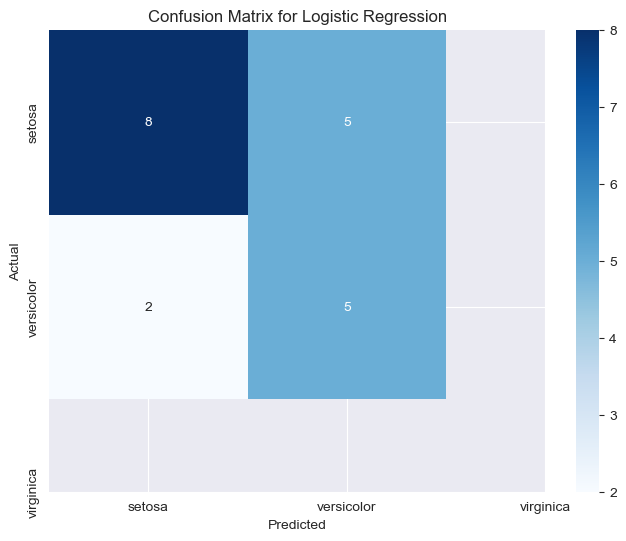

In [481]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**7.2 Evaluate the Decision Tree Model:**

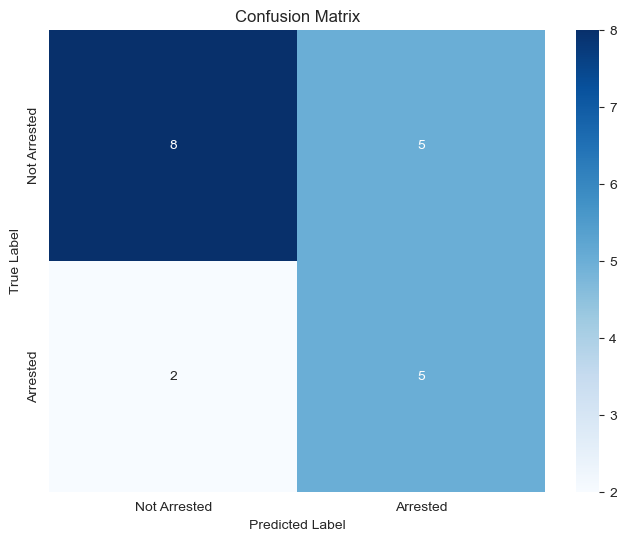

In [483]:


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Arrested', 'Arrested'], yticklabels=['Not Arrested', 'Arrested'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Conclusion

-Model Development: A binary classification model was built to predict arrest outcomes, aiming to assist law enforcement with decision-making and potentially reduce unnecessary detentions.

Data Analysis: The dataset included features like presence of weapons, time of day, and demographic details. Missing values and outliers were addressed, and categorical variables were encoded for model compatibility.

Ethical Considerations: The project underscores the importance of considering gender and race in arrest outcomes, hinting at potential biases that need to be investigated and addressed.

## Recommendations

Further research could explore the impact of additional variables not included in the current dataset.

Advanced modeling techniques could be employed to improve prediction accuracy beyond the current 80% threshold.

A deeper analysis into the potential biases related to gender and race could provide more nuanced understanding and inform training programs for officers.